# Math for ML: Probability

In this part of the Math for ML series I'll cover the basic theory of probability, focusing in this lesson on the univariate case. Multivariate probability will be covered in the next lesson.

I'll start by loading the libraries we've been working with so far. New to this lesson is the seaborn library, a plotting library that extends matplotlib by adding a bunch of nice statistical plots.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from utils.math_ml import *

plt.rcParams["figure.figsize"] = (4, 3)

Probability is the study of randomness. When dealing with randomness, variables in code can often take on unpredictable values, which makes it hard to exactly replicate results. While not always necessary, when you want to ensure that your code is exactly reproducible, you have to remember to set a **seed** when working with random numbers. The seed can be any number you want, but you should pick it and put it at the top of your code. Setting the seed will ensure that every time your code is run the outputs will agree with the results somebody else gets from running your code.

Since I want to make sure my code in this book is reproducible, I will from now on always set a seed. To set a seed in numpy, you just need to pass in `np.random.seed(seed)` right after import numpy, where `seed` can be any positive integer you like. Different seeds will produce random numbers in different orders. Below I'll choose a seed of zero, which is completely arbitrary.

In [2]:
np.random.seed(0)

In [3]:
# re-write notes

# make it more clear that histograms are just an unnormalized approximation to the true probability function

# still need to talk about probabilities of sets of outcomes, both for contin and discrete cases
# maybe cover this in the section before common distributions?
# need to cover the CDF too

## Randomness

Probability is a calculus for modeling random processes. There are things we just can't predict with certainty given the information we have available. Stuff that we can't predict with certainty we call **random**, or **noise**, or **non-deterministic**. Stuff we *can* predict with certainty we call **deterministic**. Here are some examples of these two kinds of processes. The questions in the deterministic column have definite, certain answers, while those in the random column do not.

| Deterministic Process | Random Process |
|---------------|--------|
| Does $2+2=4$?        | Will it rain today? |
| What is the capital of France? | What is the result of rolling a pair of dice? |
| How many sides does a square have? | What is the next card in a shuffled deck? |
| What is the value of pi? | What is the stock price of Apple tomorrow? |
| What is the boiling point of water at sea level? | What is the winning number for next week's lottery? |

Deterministic processes aren't terribly interesting. They either occur or don't. Random processes *might* occur. To quantify what we mean by *might* we introduce **probability**, which you can think of as a function mapping questions like "Will it rain today?" to a number between $0$ and $1$ that indicates our "degree of belief" in whether that question is true,

$$0 \leq \mathbb{Pr}(\text{Will it rain today?}) \leq 1.$$

The question inside this probability function is called an **event**. An event is anything that might occur. Technically speaking it's a mathematical *set* that lives in an abstract *sample space*.

When we're *certain* an event will occur we say it has **probability one**, or a 100% chance of happening. When we're certain an event *will not* occur we say it has **probability zero**, or a 0% chance of happening. These extremes are deterministic processes. Random processes are anything in between. For the question "Will it rain today?", we might say there is a 20% chance of rain, in which case we believe $\mathbb{Pr}(\text{Will it rain today?}) = 0.2$.

A common theme we'll see in machine learning is that we're interested in mapping arbitrary data structures like strings to numerical data structures that we can do mathematical calculations with, like floats or arrays. In this particular example, it's convenient to map the question `Will it rain today?` to a binary variable $x$,

$$
x = 
\begin{cases}
1, & \text{It will rain today} \\
0, & \text{It will not rain today}.
\end{cases}
$$

Then asking for $\mathbb{Pr}(\text{Will it rain today?})$ is the same thing as asking for the simpler expression $\mathbb{Pr}(x=1)$. Saying we believe there's a 20% chance of rain today is equivalent to saying we believe there is a 20% chance that $x=1$, i.e. $\mathbb{Pr}(x=1)=0.2$.

Variables like $x$ are called **random variables**. They're a way of encoding random processes numerically via some kind of encoding convention. It's much more convenient to work with random variables than events or questions since we can now use all our usual mathematical tools like calculus and linear algebra to understand random processes.

Random variables are most useful to think of in practice as the outputs of **random number generators**. These are algorithms that generate, or **sample**, random numbers. Unlike regular functions, where a given input will *always* produce a definite output, a random number generator can (and usually will) produce different outputs every single time the same input is passed in.

The canonical example of a random number generator is called **rand**. It's an algorithm for generating (pseudo) random real numbers between $0$ and $1$. Every time we call rand we'll get a different number with no clear pattern. Here's an example. I'll call rand via the numpy function `np.random.rand` a bunch of times. Notice how unrelated the outputs look. There's no clear pattern, other than being between $0$ and $1$.

In [4]:
array = []
for i in range(10):
    x = np.random.rand()
    array.append(x)
array

[0.5488135039273248,
 0.7151893663724195,
 0.6027633760716439,
 0.5448831829968969,
 0.4236547993389047,
 0.6458941130666561,
 0.4375872112626925,
 0.8917730007820798,
 0.9636627605010293,
 0.3834415188257777]

Think of a random variable informally as being some variable $y$ whose values are determined by a random number generator like rand, $y=\text{rand}(x)$. On one sampling we might get $y=0.548$. On another, $y=0.715$. On another $y=0.603$. Etc. We can't force $y$ to take on a definite value. It jumps around with no clear pattern.

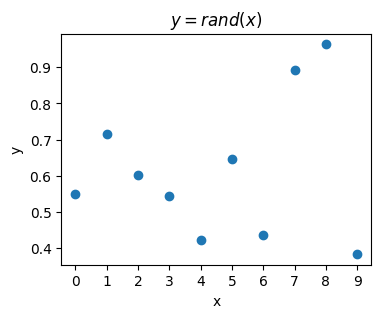

In [5]:
plt.scatter(range(10), array)
plt.xticks(range(10))
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y = rand(x)$')
plt.show();

Since random variable outputs jump around like this we need a different way to visualize them than just thinking of them as points on the number line. The most useful way to visualize random variables is using a **histogram**. To create a histogram, we sample a random variable a whole bunch of times, and plot a count of how many times the variable takes on each given value. We then show these counts in a bar chart with the heights indicating the counts for each value.

In matplotlib we can plot histograms of an array of samples `x` using the function `plt.hist(x)`. Here's an example. I'll sample 100 values from rand and put them in an array `x`, then plot the histogram. Note how I'm samping 100 values at one time, not looping through rand a bunch of times like I did above. This is doing the same thing, but it's much more efficient, vectorized code.

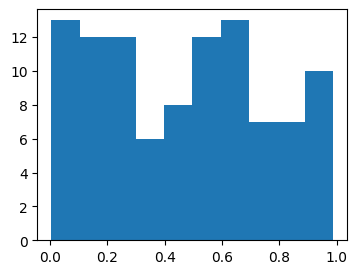

In [6]:
x = np.random.rand(100)
plt.hist(x)
plt.show()

Notice that we just sampled $100$ different values, but we don't see $100$ different bars. That's because histograms don't plot bars for *all values*. First, the values get *binned* into some number of equally spaced **bins**, then the counts that get plotted are the counts of values inside each bin. In this case, the histogram divides the samples into $10$ equally spaced bins. If you look carefully you should see $10$ bars in the plot. We can change the number of bins by passing in a keyword `bins` specifying how many bints to take.

Since I'll be using histograms a lot in this lesson I'm going to write a helper function `plot_histogram` to bundle up the code to plot them nicely. Instead of using `plt.hist`, however, I'll use the seaborn library's `sns.histplot`, which creates much nicer looking histograms. Seaborn is an extension library of matplotlib made specifically for making nicer plots of data. Ignore the `is_discrete` argument for now. I'll use it below.

In [7]:
def plot_histogram(x, is_discrete=False, title='', bins=10):
    if is_discrete:
        sns.countplot(x=sorted(np.array(x).astype(str), key=lambda x: int(x)))
    else:
        sns.histplot(x, bins=bins)
    plt.title(title)
    plt.show()

It's still kind of hard to see if the $100$ rand samples have any kind of pattern in the above histogram plot. Let's now sample 10,000 numbers from rand and see if we can find one.

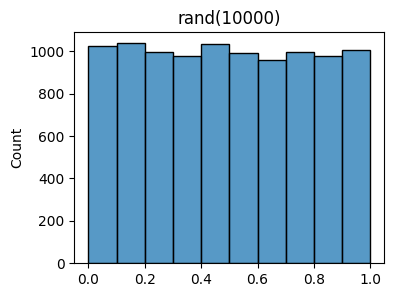

In [8]:
x = np.random.rand(10000)
plot_histogram(x, title=f'rand({10000})', bins=10)

It should be increasingly clear now that what's going on is that rand is sampling numbers between 0 and 1 with equal probability. Each bin should contain roughly $\frac{10000}{10}=1000$ counts, since there are $10000$ samples and $10$ bins. Said differently, the *values* in each bin should have a $\frac{1}{10}=0.1$ probability of being sampled. For example, the values in the left-most bin, call it $\text{bin}_0 = [0, 0.1]$ should have

$$\mathbb{Pr}(x \in \text{bin}_0) = \mathbb{Pr}(0 \leq x \leq 0.1) = 0.1.$$

This type of "flat", equal probability sampling is called **uniform sampling**.

You may be questioning that it's indeed the case that each bin is truly getting sampled as much as the other bins. After all, the plot still clearly shows their heights vary a bit. Some bins have slightly more values than others do. We can look at how many counts are in the bin using `np.histogram`, which also defaults to $10$ bins. You can see some bins have as many as $1037$ values, some as few as $960$ values.

In [9]:
bin_counts, _ = np.histogram(x)
bin_counts

array([1024, 1037,  994,  979, 1035,  992,  960,  998,  976, 1005])

This variation in the bin counts is really due to the fact that we're only sampling a finite number of values. To get *true* uniform sampling, where all bins have the same counts, we'd have to sample an infinitely large number of times.

Here's a rule of thumb for how much the bin counts should be expected to fluctuate as a function of the sample size. If $N$ is the number of samples, and each bin $k$ contains $N_k$ counts (i.e. its bar height is $N_k$), then you can expect the counts to fluctuate above and below $N_k$ by about

$$\sigma_k = \sqrt{N_k\bigg(1 - \frac{N_k}{N}\bigg)}.$$

Said differently, the counts should be expected to roughly lie in a range $N_k \pm \sigma_k$. This notation means the same thing as saying the counts should roughly speaking lie in the range $[N_k - \sigma_k, N_k + \sigma_k]$. By "roughly", I mean sometimes bins can have counts outside this range, but it's uncommon.

In the above example, there are $N=10000$ samples, and each bin has about $N_k=1000$ counts, so you should expect the counts to fluctuate by about

$$\sigma_k = \sqrt{1000\bigg(1 - \frac{1000}{10000}\bigg)} = 30,$$

which means the counts should rougly lie in the range $1000 \pm 30$. This seems to be in line with what we're seeing experimentally. Notice as the sample size $N \rightarrow \infty$, the fluctuations $\sigma_k \rightarrow 0$. We'll see where this rule comes from later (hint: the binomial distribution).

Back to random variables. Broadly speaking we can divide random variables into two classes of distributions:
- discrete distributions: random variables that can only take on a discrete set of values.
- continuous distributions: random variables that can take on any continuum of real values.

I'll start by talking about the discrete case since it's easier to understand.

## Discrete Probability

### Motivation: Rolling a Die

Consider a very simple toy problem: rolling a die (singular of dice). If you've never seen dice before, they're white cubes with black dots on each face of the cube. Each face gets some number of black dots on it between 1 and 6. People like to "roll" these dice in games by shaking and tossing them onto the ground. The person with the highest score, i.e. the sum of the number of dots facing upward, wins that round.

<br><br><center><span style="font-size: 80px;">&#127922;</span></center><br>

Let's think a little bit about a single die. Suppose I want to roll a single die. Having not thrown the die yet, what should I "expect" my score to be? Call this score $x$. The possible scores I can have are just the number of dots on each face of the die, i.e. $1,2,3,4,5,6$. This alone doesn't tell me what the chance is that any given $x$ turns up in a roll. We need some other information.

Perhaps your common sense kicks in and you think, "Well clearly each number has an equal chance of showing up if you roll the die". This is called the **principle of indifference**. In practice you'd usually be right. You're saying that, since we don't have any other information to go on, each number should have an equal chance of showing up on each roll. That is, on any given roll, the random variable $x$ should take on each value $k=1,2,\cdots,6$ with probability,

$$\mathbb{Pr}(x=k) = \frac{1}{6}.$$

Denote these probabilities as $p_k$ for short, so $p_k = \mathbb{Pr}(x=k)$. Observe,
1. Each probability is non-negative, $p_k = \frac{1}{6} \geq 0$,
2. The sum of all probabilities is one, $\sum_{k=0}^5 p_k = 6 \cdot \frac{1}{6} = 1$.

These two properties are the defining characteristics of a probability. After all, we *defined* probability as a function $0 \leq \mathbb{Pr}(x=k) \leq 1$. The second condition is just a mathematical way of saying that rolling the die must return *some* value between $1$ and $6$. It can't just make up some new value, or refuse to answer.

Anyway, suppose I rolled the die $36$ times and got the following values:

| Roll | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 |
|------|---|---|---|---|---|---|---|---|---|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| **Value** | 3 | 4 | 5 | 4 | 3 | 1 | 3 | 6 | 5 | 2 | 1 | 5 | 4 | 2 | 1 | 1 | 1 | 6 | 5 | 6 | 3 | 5 | 5 | 3 | 3 | 6 | 6 | 1 | 5 | 4 | 2 | 2 | 4 | 6 | 2 | 4 |

We can make a histogram out of these and check the principle of indifference by verifying the bins are all of about the same height (at least as close to the same as only 30 rolls will allow). Note that I'm now using `is_discrete=True` here, which tells the helper function to use a slightly different plot `sns.countplot`, which makes nicer histograms for discrete data like this.

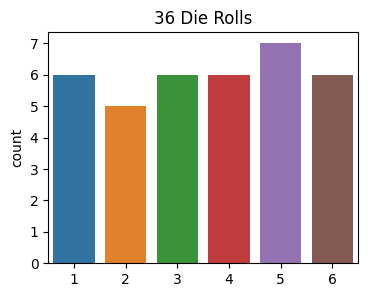

In [10]:
x = [3, 4, 5, 4, 3, 1, 3, 6, 5, 2, 1, 5, 4, 2, 1, 1, 1, 6, 5, 6, 3, 5, 5, 3, 3, 6, 6, 1, 5, 4, 2, 2, 4, 6, 2, 4]
plot_histogram(x, is_discrete=True, title='36 Die Rolls')

Given the fact that I only rolled $36$ times, this histogram looks very uniform, giving a pretty strong hint that each value has an equal probability of being rolled. Since most bars have height $6$, they correspond to probabilities of $\frac{6}{36}=\frac{1}{6}$, which is what our common sense expected. Note the counts can fluctuate in this case in a range of about $6 \pm 2$. This is an example of a *fair die*.

What if our common sense was incorrect? What if I rolled the die a bunch of times and found out some numbers occurred a lot more often than others? This would happen if the die were weighted unevenly, or *loaded*. In this case we're left to assign some *weight* $N$ to each number $k$.

To determine what the right weights should be empirically, probably the easiest way would again be to roll the die a bunch of times and count how many times each value $k$ occurs. Those counts will be your weights $N_k$. These are just the heights of each bin in the histogram. To turn them into probabilities $p_k$, divide by the total number of rolls, call it $N$. The probabilities would then be given approximately by

$$p_k = \mathbb{Pr}(x=k) \approx \frac{N_k}{N}.$$

As $N \rightarrow \infty$ this equality goes from approximate to exact. Another way of saying this is that we could *define* the probability $\mathbb{Pr}(x=k)$ as the limit

$$\mathbb{Pr}(x=k) = \lim_{N \rightarrow \infty} \frac{N_k}{N}.$$

This is an alternate way of defining a probability, different from the "degree of belief" approach I used above. This is usually called the **frequentist** or objective approach. In this approach, probability is the frequency of the number of times an outcome occurs in an experiment, i.e. $\frac{N_k}{N}$. In contrast, the "degree of belief" perspective is called the **Bayesian** or subjective approach. Both approaches have their uses, so we'll go back and forth between the two as it suits us.

To test if your die is loaded, what you can do is roll the die $N$ trials and calculate the probabilities. If they're all roughly equal to $1/6$ like the example above then the die is fair. Otherwise it's loaded. Suppose when I'd rolled the die I'd instead gotten the following outcomes:

| Roll | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 |
|------|---|---|---|---|---|---|---|---|---|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
| **Value** | 4 | 4 | 5 | 4 | 3 | 5 | 3 | 6 | 5 | 6 | 1 | 5 | 4 | 5 | 6 | 5 | 1 | 6 | 5 | 6 | 3 | 5 | 5 | 4 | 3 | 6 | 6 | 4 | 5 | 4 | 2 | 5 | 4 | 6 | 2 | 4 |

Let's plot the histogram of these outcomes and compare to the fair die case.

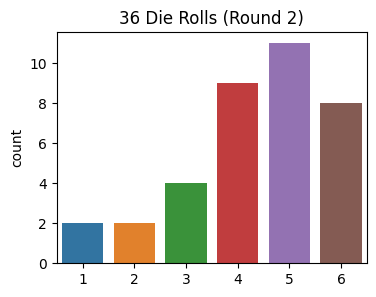

In [11]:
x = [4, 4, 5, 4, 3, 5, 3, 6, 5, 6, 1, 5, 4, 5, 6, 5, 1, 6, 5, 6, 3, 5, 5, 4, 3, 6, 6, 4, 5, 4, 2, 5, 4, 6, 2, 4]
plot_histogram(x, is_discrete=True, title='36 Die Rolls (Round 2)')

Notice how now the outcomes are skewed towards higher values. This clearly doesn't look uniform anymore since most of the counts aren't in the expected range of $6 \pm 2$. The die has been "loaded to roll high". 

Using the frequentist approach we can estimate what the probability of rolling each value is. To do that, we can get each of the bin counts and divide them all by $n=36$. The probabilities are given below. Notice they sum to one, like you'd expect.

In [12]:
counts, _ = np.histogram(x, bins=6)
N = len(x)
p = counts / N
[f"Pr(x={i+1}) = {round(p[i], 3)}" for i in range(len(p))]

['Pr(x=1) = 0.056',
 'Pr(x=2) = 0.056',
 'Pr(x=3) = 0.111',
 'Pr(x=4) = 0.25',
 'Pr(x=5) = 0.306',
 'Pr(x=6) = 0.222']

### General Case

Of course, there's nothing special about a die. We can define probabilities in exactly the same way for any discrete random variable. A random variable $x$ is called **discrete** if it can take on one of $k$ countable values $x_0,x_1,\cdots,x_{k-1}$. Suppose we run an experiment $n$ times and observe the outcomes of $x$ at each trial. If $x=x_j$ for some number of counts $n_j$, then the probability $x=x_j$ is given by the limit of running the experiment infinitely many times,

$$p_j = \mathbb{Pr}(x=x_j) = \lim_{n \rightarrow \infty} \frac{n_j}{n}.$$

The set of values that $x$ can take on are called the **support** of the random variable. For values outside the support, it's assumed the probability is zero. As will always be true with probabilities, it's still the case that each probability must be non-negative, and they must all sum to one,

$$p_j \geq 0, \quad \sum_{j=0}^{k-1} p_j = 1.$$

While we have an experimental way to calculate probabilities now, it would be useful to define probabilities as functions of random variables so we can study them mathematically. These functions are called **probability distributions**. Suppose $p_j = p(x_j)$ for some function $p(x)$. We say $x$ is distributed as $p(x)$, written in short-hand as $x \sim p(x)$. If $x$ is discrete, we call the function $p(x)$ a **probability mass function**, or **PMF** for short.

In the simple case of the fair die, since each $p_j = \frac{1}{6}$, its PMF is just the simple constant function $p(x) = \frac{1}{6}$. This distribution is an example of the **discrete uniform distribution**. If $x$ is a discrete random variable taking on one of $k$ outcomes, and $x$ is distributed as discrete uniform, then its probabilities are given by $p_j = \frac{1}{k}$ for all $j$. In histogram language, all bins have approximately the same number of counts.

In the less simple case of the loaded die we had to estimate each probability empirically. Supposing we could calculate those probabilities exactly, the PMF for that particular loaded die would look like

$$
p(x) = 
\begin{cases}
0.056, & x = 1, \\
0.056, & x = 2, \\
0.111, & x = 3, \\
0.250, & x = 4, \\
0.306, & x = 5, \\
0.220, & x = 6.
\end{cases}
$$

This is an example of a **categorical distribution**. Their histograms can look completely arbitrary. Each bin can contain as many counts as it likes. All that matters is that $k$ is finite and all the probabilities sum to one. Any time you take a discrete uniform random variable and weigh the outcomes (e.g. by loading a die) you'll create a categorical distribution.

Typically each distribution will have one or more parameters $\theta$ that can be adjusted to change the shape or support of the distribution. Instead of writing $p(x)$ for the PMF, when we want to be explicit about the parameters we'll sometimes write $p(x; \theta)$. The semi-colon is used to say that any arguments listed after it are understood to be parameters, not function inputs. In this notation, parameters of a distribution are assumed to be known, non-random values. We'll relax this requirement below, but assume parameters are non-random for now.

For example, the discrete uniform distribution has two parameters indicating the lowest and highest values in the support, called $a$ and $b$. We could thus express its PMF as $p(x;a,b)$, which means "the probability of $x$ given *known* parameters $a$ and $b$".

Using these parameters, it's also common to use special symbols as a short-hand for common distributions. For example, the discrete uniform distribution with parameters $a$ and $b$ is often shortened to something like $DU(a,b)$. If we want to say $x$ is a discrete uniform random variable, we'd write $x \sim DU(a,b)$. You'll also sometimes see people use the symbol to write the PMF as well, for example $DU(x;a,b)$.

### Discrete Distributions

Some discrete probability distributions occur so frequently that they get a special name. Each one tends to occur when modeling certain kinds of phenomena. Here are a few of the most common discrete distributions. I'll just state them and summarize their properties for future reference.

#### Discrete Uniform Distribution
- Symbol: $DU(a,b)$
- Parameters: Integers $a, b$ with $a < b$, representing the min and max values in the support
- Support: $x=a,a+1,\cdots,b-1$
- Probability mass function: $$p(x; a,b) = \frac{1}{b-a}, \ \text{ for } x = a, a+1, \cdots, b-1.$$
- Cumulative distribution function: $$P(x; a,b) = \frac{\text{int}(x) - a}{b-a}.$$
- Examples: The fair die, taking $a=1, b=7$ gives $x \sim D(1,7)$ with $p(x) = \frac{1}{7-1} = \frac{1}{6}$
- Sampling function: `np.random.randint(a, b)`
- Notes:
    - Used to model discrete processes that occur with equal weight, or are suspected to (the principle of indifference)

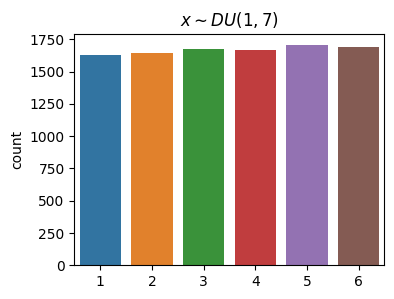

In [13]:
a = 1
b = 7
x = np.random.randint(a, b, size=10000)
plot_histogram(x, is_discrete=True, title=f'$x \sim DU({a},{b})$')

#### Bernoulli Distribution

- Symbol: $\text{Ber}(\text{p})$
- Parameters: $0 \leq \text{p} \leq 1$ representing the probability of getting $x=1$
- Support: $x=0,1$
- Probability mass function:
$$
p(x; \text{p}) = \text{p}^x (1-\text{p})^{1-x} = 
\begin{cases}
1-\text{p} & x = 0, \\
\text{p} & x = 1.
\end{cases}
$$
- Cumulative distribution function:
$$
P(x; \text{p}) = 
\begin{cases} 
0 & \text{if } x < 0 \\
1-p & \text{if } 0 \leq x < 1 \\
1 & \text{if } x \geq 1.
\end{cases}.
$$
- Example: Flipping a fair coin, where $\text{tails} = 0$, $\text{heads} = 1$, and $\text{p}=\frac{1}{2}$
- Sampling function: `np.random.choice([0, 1], p=[1 - p, p])`
- Notes:
    - Used to model binary processes where the probability of success can be estimated
    - Used for binary classification. Given a sample $\mathbf{x}$ with some binary output $y=0,1$. If $\text{p}=\hat y$, then $y|\mathbf{x} \sim \text{Ber}(\hat y)$.

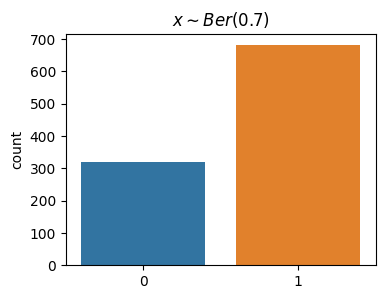

In [14]:
p = 0.7
x = np.random.choice([0, 1], p=[1 - p, p], size=1000)
plot_histogram(x, is_discrete=True, title=f'$x \sim Ber({p})$')

#### Categorical Distribution

- Symbol: $\text{Cat}(p_0,p_1,\cdots,p_{k-1})$ or $\text{Cat}(\mathbf{p})$
- Parameters: $k$ non-negative real numbers $p_j$ that sum to one, each representing the probability of getting $x_j$
    - Commonly written as a vector $\mathbf{p} = (p_0,p_1,\cdots,p_{k-1})$
- Support: $x = 0, 1, \cdots, k-1$
- Probability mass function:
$$
p(x; \mathbf{p}) = \begin{cases}
p_0 & x = 0, \\
p_1 & x = 1, \\
\vdots & \vdots \\
p_{k-1} & x = k-1.
\end{cases}
$$
- Cumulative distribution function:
$$
P(x; \mathbf{p}) = 
\begin{cases}
0 & \text{if } x \leq x_0 \\
p_0 & \text{if } x_0 \leq x \leq x_1 \\
p_0 + p_1 & \text{if } x_1 \leq x \leq x_2 \\
p_0 + p_1 + p_2 & \text{if } x_2 \leq x \leq x_3 \\
\vdots & \vdots \\
1 & \text{if } x \geq x_{n-1}.
\end{cases}
$$

- Example: A loaded die, where $k=6$ and each face $j$ rolls with probability $p_j$
- Sampling function: `np.random.choice(np.arange(k), p=p)`
- Notes:
    - Used to model categorical processes where a finite number of classes can occur with arbitrary probabilities
    - Used for multiclass classification. Given a sample $\mathbf{x}$ with outputs in one of $k$ classes $y=0,1,\cdots,k-1$. If $\mathbf{p}=\mathbf{\hat y}$, then $\mathbf{y}|\mathbf{x} \sim \text{Cat}(\mathbf{\hat y})$.

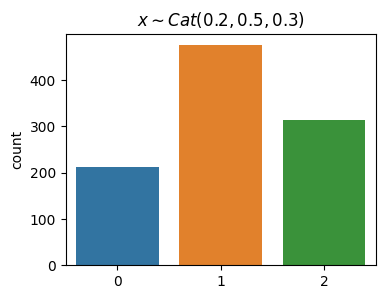

In [15]:
p = [0.2, 0.5, 0.3]
x = np.random.choice(np.arange(len(p)), p=p, size=1000)
plot_histogram(x, is_discrete=True, title=f'$x \sim Cat{tuple(p)}$')

#### Binomial Distribution

- Symbol: $\text{Bin}(n, \text{p})$
- Parameters: positive integer $n$ and some $0 \leq \text{p} \leq 1$
- Support: $x = 0, 1, \cdots, n$
- Probability mass function:
$$p(x; n,\text{p}) = \binom{n}{x} \text{p}^{x} (1-\text{p})^{n-x}, \ \text{for} \ x=0,1,\cdots,n, \ \text{where} \ \binom{n}{x} = \frac{n!}{x!(n-x)!}.$$
- Cumulative distribution function: $$P(x; n,\text{p}) = \sum_{k=0}^{\text{int}(x)} {n \choose k} p^k(1-p)^{n-k}.$$
- Example: Flipping a fair coin $n$ times and counting the number of heads
- Sampling function: `np.random.binomial(n, p)`
- Notes:
    - Used to model the number of successes from $n$ independent binary processes (analogous to coin flips)
    - The number of counts in each bin of a histogram of independent samples can be modeled as a binomial random variable

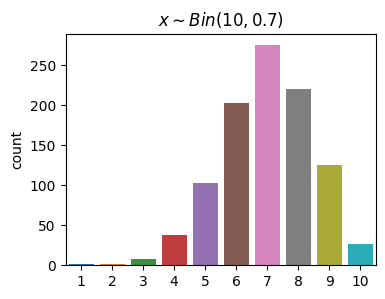

In [39]:
n = 10
p = 0.7
x = np.random.binomial(n, p, size=1000)
plot_histogram(x, is_discrete=True, title=f'$x \sim Bin{(n,p)}$')

#### Poisson Distribution

- Symbol: $\text{Poisson}(\lambda)$
- Parameters: $\lambda \geq 0$
- Support: $x = 0, 1, 2, 3, \cdots$
- Probability mass function:
$$p(x; \lambda) = \frac{\lambda^x e^{-\lambda}}{x!}, \quad \text{for} \ x=0,1,2,3,\cdots.$$
- Cumulative distribution function:
$$P(x; \lambda) = e^{-\lambda}\sum_{k=0}^{\text{int}(x)}\frac{\lambda^k}{k!}.$$
- Example: The number of people walking through the door of a coffee shop per hour can be modeled as a Poisson distribution
- Sampling function: `np.random.poisson(lambda)`
- Notes:
    - Used to model counting processes, like the number of calls coming into a call center, or the number of times a Geiger counter registers a click

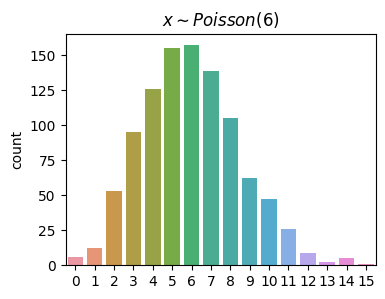

In [17]:
lambda_ = 6
x = np.random.poisson(lambda_, size=1000)
plot_histogram(x, is_discrete=True, title=f'$x \sim Poisson({lambda_})$')

## Continuous Probability

### Motivation: Measuring Voltages

So far we've covered discrete random variables, ones that take on a finite (or countably infinite) set of values. We can also consider random variables that take on a continuous range of values. For example, a continuous random variable $x$ can take on values in the entire interval $[0,1]$, or the whole real line $\mathbb{R} = (-\infty, \infty)$. The key difference between continuous variables and discrete variables is that we have to think in terms of calculus now. Instead of points we'll have infinitesimal areas. Instead of sums we'll have integrals.

It may not be obvious to you that there are practical examples where continuous random variables would be useful. After all, things like flipping coins, rolling dice, and playing cards are all discrete variable scenarios. Here are some examples of things we can model with a continuous random variable:
- The behavior of the random number generator rand
- The total sales a business will do next quarter.
- The time it takes for a customer to complete a purchase in an online store.
- The amount of fuel consumed by a vehicle on a given day.
- The height of waves in the ocean at a given time.
- The length of a stay in a hospital by a typical patient.
- The amount of rainfall in a specific region over a period of time.
- The measured voltage of a car battery at any point in time.

Let's look at the last example. Suppose you have a car that starts acting up. You suspect the battery might be dying and wonder if you should pay to replace it. Rather than take the car to the mechanic, you realize you own your own voltmeter. You can thus measure the health of the battery yourself by checking its voltage. You know that a healthy car battery should have a voltage around 12 Volts. However, you also know that your voltmeter is low quality because you wouldn't pay for a better one. The voltmeter claims its voltage readings can have errors on the order of $\pm 10\%$ from the measured value. This means if you get a measured voltage of $12$ Volts, the reading could be off by $10\%$ in either direction, meaning the true voltage could be anything from $12-1.2=10.8$ Volts to $12+1.2=13.2$ Volts. Realizing this, you decide that what you'll do is take a bunch of independent measurements of your battery's voltage all in the same day. You decide to take 15 measurements, and get the following.

| measurement | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   | 13   | 14   | 15  |
|-------------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|
| **voltage**       |11.783|11.099|11.532|11.731|13.104|12.585|10.25 |12.974|11.316|11.518|11.418|11.236|13.084|12.766|13.893|


In [64]:
x = [11.783, 11.099, 11.532, 11.731, 13.104, 12.585, 10.25, 12.974, 11.316, 11.518, 
     11.418, 11.236, 13.084, 12.766, 13.893]

Just like we did with rand at the beginning of this lesson, let's plot this data in a histogram. Since it's continuous, we actually do have to bin the counts. We don't want one bin for every single value now. Rather, we want each bin to represent an interval of values, e.g. $[10, 11], [11, 12], [12, 13]$.

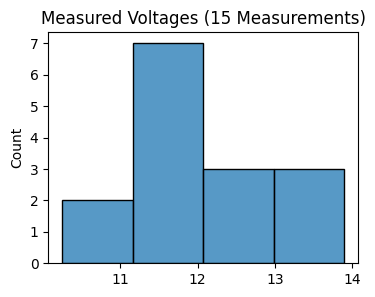

In [66]:
plot_histogram(x, bins=4, title='Measured Voltages (15 Measurements)')

The histogram helps understand what's going on with the voltage measurements. It seems like most of the time you're getting values somewhere around 12, but they can fluctuate a good bit. Some are as small as 10.25, others as large as 13.893. That's quite a range. Over 3.6 Volts in fact. Can you reliably conclude from these measurements that your battery is measuring a healthy 12 Volts? It seems like it is, but the measurements are all over the place.

You decide to take a few more to be safe. You stand under your car all day just measuring your battery's voltage. This time you're able to get 1000 measurements. I won't write them down. But they generate the following histogram.

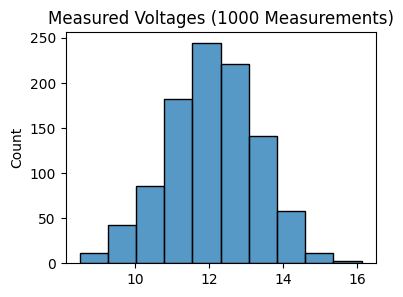

In [59]:
x = np.random.normal(12, 1.2, 1000)
plot_histogram(x, bins=10, title='Measured Voltages (1000 Measurements)')

It now seems more clear what's going on. You're getting a bell curve shape, i.e. a Gaussian. Let's try to figure out where it's centered, and how much the measurements fluctuate. We can estimate the center by calculating the mean of the measurements, and the fluctuations by calculating their standard deviation.

In [50]:
mean = np.mean(x)
std = np.std(x)

print(f'mean = {mean}')
print(f'standard deviation = {std}')

mean = 11.98479715813543
standard deviation = 1.1647230110381646


The mean is definitely very close to 12 Volts. Your battery is probably fine. But let's be sure. Since the measurements are Gaussian, we know that about 95% of the values should lie within 2 standard deviations (or 2-sigma) of the mean. Let's just make sure that 12 Volts is inside this range. If it is, you can be about 95% confident that your battery is indeed healthy. It looks like the 2-sigma interval is $[9.655, 14.314]$. Since $12$ is inside this interval you should feel pretty good for your battery.

In [53]:
print(f'2-sigma confidence interval: [{(mean - 2 * std).round(3)}, {(mean + 2 * std).round(3)}]')

2-sigma confidence interval: [9.655, 14.314]


I haven't defined what any of this stuff is yet. Gaussian distributions. Means. Standard deviations. Confidence intervals. The point isn't to learn about all that stuff. I'll get to it soon. The point is just to take away a real life example of a continuous random variable, the measured the voltage of a car battery, and how you can use it to make decisions. Let's go into more detail on the math now.



### Definitions

What we'll want to do instead is count up the number of occurrences inside a bunch of tiny *subintervals*. Suppose $x$ is defined on some continuous interval $a \leq x \leq b$. Let's divide this interval up into $K$ tiny sub-intervals of length $dx$,

$$a_0 = a + 0dx \leq a_1 = a + dx \leq a_2 = a + 2dx \leq \cdots \leq a_{M} = a + Kdx = b.$$

Now let's do as before with the discrete case. Run an experiment $N$ times and count how many times outcomes occur, not for each $x$, but for each *subinterval* $a_k \leq x \leq a_{k+1}$, call it $n_k$. Then we again have,
$$\mathbb{Pr}(a_k \leq x \leq a_{k+1}) = p_k \approx \frac{n_k}{N},$$

with the equality becoming exact as $N$ gets infinitely large.

For continuous variables we don't usually write it this way. I'll rewrite $n_k$ by factoring out the $dx$ and writing $n_k=n(x)dx$. Then,

$$\mathbb{Pr}(a_k \leq x \leq a_{k+1}) = \frac{n(x)}{N} dx.$$

One more step. Instead of talking about the ratio of counts $\frac{n(x)}{N}$, it's more preferable to imagine $N$ to be infinitely large and define a **probability density function** (or **PDF**) by
$$p(x) = \frac{n(x)}{N}.$$

Then the probability that $x$ is in the infinitesimally small subinterval $a_k \leq x \leq a_{k+1}$ is just

$$\mathbb{Pr}(a_k \leq x \leq a_{k+1}) = p(x) dx.$$

For larger, finite intervals like $a \leq x \leq b$, we just sum up all these $p(x) dx$ values over each subinterval. Provided $dx$ is infinitesimal, this sum becomes an integral
$$\mathbb{Pr}(a \leq x \leq b) = \int_a^b p(x) dx.$$

**Remark:** Note that even though we used $p(x)$ as the probability function in the discrete case, it's not *quite* the same thing as the density function $p(x)$ in the continuous case. The continuous equivalent of the probability function is now $p(x) dx$. In fact, the density function now has units. If $dx$ has units of length for example, then $p(x)$ must have units of inverse length, since probabilities must be dimensionless. Other than this subtlety, you won't lose too much by thinking of the discrete probability function and the continuous density function as basically the same thing, which is why $p(x)$ is used for both.

To be a valid density function it's only necessary that $p(x)$ be a positive function, i.e. $p(x) \geq 0$. It's not required that it sum to one. In fact, any given $p(x)$ value can be as large as we like. All that matters is that the *area under the curve* of $p(x)$ is one when summed over all $x$ values in the support $S$ of the distribution,

$$\int_S p(x) dx = \int_{-\infty}^{\infty} p(x) dx = 1.$$

We can thus choose *any* positive weighting function $w(x) \geq 0$ we like as a density function. To turn $w(x)$ into a density function, just divide it by its area $A$ over its support,
$$p(x) = \frac{w(x)}{A} = \frac{w(x)}{\int_{-\infty}^\infty w(x) dx}.$$

In continuous probability, it's common to define probabilities like $\mathbb{Pr}(a \leq x \leq b)$ using a **continuous distribution function** or **CDF**, defined as the integral of the density function,
$$P(x) = \mathbb{Pr}(-\infty \leq x) = \int_{-\infty}^x p(x')dx'.$$

That is, the CDF is the sum of all probabilities from negative infinity up to the point $x$. Using this notation, one can write the probability of any interval as a difference of CDFs evaluated at the endpoints of the interval,

$$\mathbb{Pr}(a \leq x \leq b) = P(b) - P(a).$$

### Common Continuous Distributions

Here are a couple continuous distributions, ones that show up in machine learning often enough that it's worth remembering their names and forms. There are many other common ones that show up in related fields like statistics, but I don't see a need to mention them.

**Uniform Distribution:** $U(a,b)$

The uniform distribution, denoted $U(a,b)$, is defined via two real-valued parameters $a < b$. Its density function is defined on the interval $a \leq x \leq b$, and given by
$$
p(x) = \begin{cases}
\frac{1}{b-a} & \text{for all } a \leq x \leq b, \\
0 & \text{otherwise}.
\end{cases}
$$

As you'd have guessed, the uniform distribution is the continuous equivalent of the discrete uniform distribution, and has pretty much the same properties as its discrete cousin does. The $\frac{1}{b-a}$ is just a normalizing factor that ensures the distribution has unit area, since $(b-a) \cdot \frac{1}{b-a} = 1$.

The shorthand for this distribution is $U(a,b)$. Sampling a value $x$ from the uniform distribution would look like $x \sim U(a,b)$. The special distribution $U(0,1)$, i.e. rand, is called the standard uniform distribution.

Just as in the discrete case, the histogram provides a good approximation for the density function $p(x)$, and becomes more and more exact as $N$ gets large. The only caveat is that histograms won't always be *normalized* to fall between 0 and 1. The shape will still be more or less the same as the density, however.

The special case where $a=0, b=1$ just generates continuous numbers between 0 and 1. This is just rand. To get continuous numbers in other ranges we can just rescale rand. Alternatively, you can just use the numpy function `np.random.uniform` like so. The histogram for the uniform distribution is flat on $a \leq x \leq b$ and zero elsewhere.

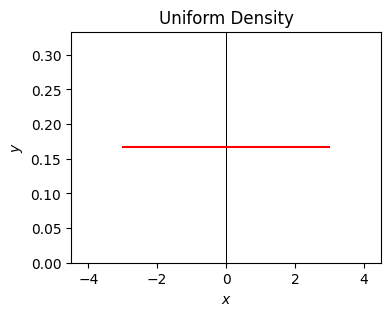

In [35]:
a, b = -3, 3
x = np.linspace(a, b, 1000)
p = lambda x: 1 / (b - a) * np.ones(len(x))
plot_function(x, p, xlim=(1.5 * a, 1.5 * b), ylim=(0, 2 / (b - a)), title='Uniform Density', show_grid=False)

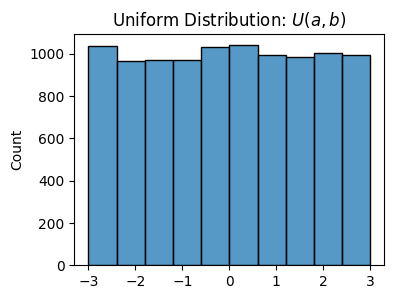

In [36]:
x = np.random.uniform(a, b, size=10000)
plot_histogram(x, title='Uniform Distribution: $U(a,b)$')

**Gaussian Distribution:** $\mathcal{N}(\mu, \sigma^2)$

The Gaussian distribution (or normal distribution), denoted $\mathcal{N}(\mu, \sigma^2)$, is defined with two real parameters $\mu$ and $\sigma^2 \geq 0$ on the entire real line. Its density function is given by
$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\bigg(-\frac{(x - \mu)^2}{2\sigma^2}\bigg)}.$$

This function is the classic **bell curve**. Here's what it looks like in the *standard* case when $\mu=0, \sigma^2=1$. This distribution, written $\mathcal{N}(0,1)$, is called the standard Gaussian distribution.

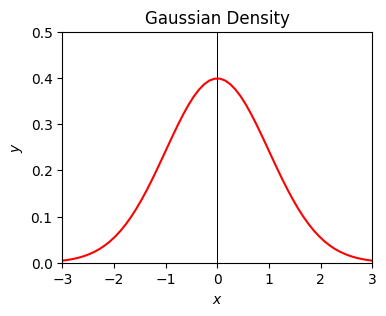

In [22]:
x = np.linspace(-5, 5, 100)
p = lambda x: 1 / np.sqrt(2 * np.pi) * np.exp(-1/2 * x**2)
plot_function(x, p, xlim=(-3, 3), ylim=(0, 0.5), title='Gaussian Density', show_grid=False)

The Gaussian distribution is important for many reasons. One reason is that it's frequently a good model for measurement error, like the example I gave above. In fact, I generated the measurement data we saw using parameters $\mu=10.1, \sigma^2 = 0.4^2$.

The CDF of the Gaussian sometimes shows up as well in calculations. It doesn't have a closed form. The standard form CDF is so common we use a special symbol $\Phi(x)$ for it,

$$\Phi(x) = P(x) = \int_{-\infty}^x \frac{1}{\sqrt{2 \pi}} \exp{\bigg(-\frac{1}{2}x'^2\bigg)} dx'.$$

Here's what the CDF $\Phi(x)$ looks like. Even though we can't explicitly write down its functional form, we can use the `scipy.stats` function `norm.cdf` to get it for us. Notice the curve is monotonically increasing from 0 to 1 over the real line. It looks basically like a sigmoid function. This is more or less what CDFs look like in general, except they may be scaled differently.

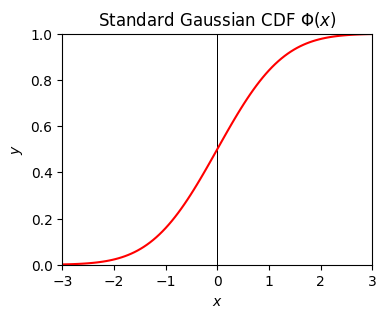

In [24]:
from scipy.stats import norm

x = np.linspace(-3, 3, num=100)
phi = lambda x: norm.cdf(x)

plot_function(x, phi, xlim=(-3, 3), ylim=(0, 1), title='Standard Gaussian CDF $\Phi(x)$', show_grid=False)

But what do the parameters $\mu$ and $\sigma^2$ actually do here? If you stare at the density function, you'll see it peaks when the exponent is zero, i.e. when $x=\mu$. Evidently, $\mu$ describes the center or peak of the distribution. It's called the **mean**. What about $\sigma^2$? Ignore the constant out front and just stare at the exponential again. Notice $\sigma^2$ is in the denominator of the exponent. As $\sigma^2$ gets bigger the exponent gets smaller, hence the curve gets flatter. And as $\sigma^2$ gets smaller the exponent gets larger, hence the curve gets sharper. It's called the **variance**. We'll talk more about the mean and variance soon. We can define them for any almost smooth distribution, continuous or discrete.

To sample from a Gaussian distribution we can use `np.random.normal(mu, sigma)`. Unfortunately this function takes the square root of the variance $\sqrt{\sigma^2}=\sigma$ as a parameter, not the variance $\sigma^2$ itself. Try not to get this mixed up. Note we can also sample from the *standard* Gaussian $\mathcal{N}(0,1)$ using the simpler function `np.random.randn`.

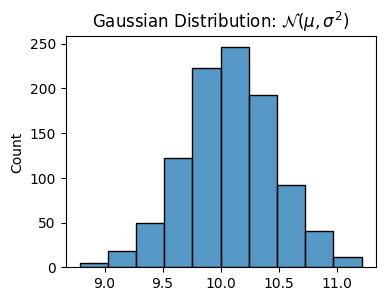

In [25]:
mu = 10.1
sigma = 0.4
x = np.random.normal(mu, sigma, size=1000)
plot_histogram(x, title='Gaussian Distribution: $\mathcal{N}(\mu, \sigma^2)$')

**Laplace Distribution:** $\text{Laplace}(\mu, \sigma)$

The Laplace distribution, denoted $\text{Laplace}(\mu, \sigma)$, is very similar to the Gaussian distribution. It has a "shift" parameter $\mu$ and a "scale" parameter $\sigma$, and is defined on the whole real line by the density function
$$p(x) = \frac{1}{2\sigma} \exp\bigg(-\frac{|x-\mu|}{\sigma}\bigg).$$

Notice how similar this density looks to the Gaussian density. The shift parameter $\mu$ again acts to center the distribution, as well as its mean. The scale parameter $\sigma$ again acts as a sort of measure of the "spread" of the distribution, but its square isn't exactly the variance (it's half the variance). The main difference to notice is that we're looking at the *absolute* difference $|x-\mu|$ instead of the *mean square* difference $(x-\mu)^2$.

This difference makes the behavior of the curve look somewhat different at the peak and the tails of the distribution. At the peak $x=\mu$, instead of having a smooth bell shape, the Laplace density has a sharp peak. The tails on both sides also fall of somewhat slower than the Gaussian does, which makes it more likely it'll sample points further away from the center.

In python, we can sample from the Laplace distribution using `np.random.laplace(mu, sigma)`. Here's a plot of the density function along with the mirroring histogram. Notice that how sharply peaked things are around the center. Also note how fat the tails are on each end, and how much more likely it is that "larger" values get sampled compared to the Gaussian.

- add in exponential, multivariate laplace, student-t

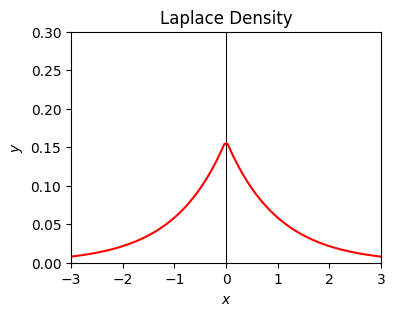

In [26]:
x = np.linspace(-3, 3, 100)
p = lambda x: 1 / (2 * np.pi) * np.exp(-np.abs(x))
plot_function(x, p, xlim=(-3, 3), ylim=(0, 0.3), title='Laplace Density', show_grid=False)

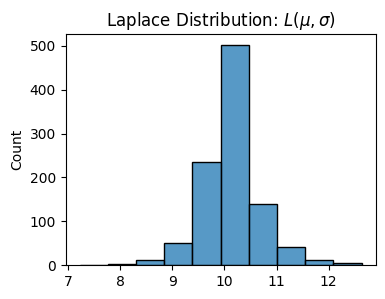

In [27]:
mu = 10.1
sigma = 0.4
x = np.random.laplace(mu, sigma, size=1000)
plot_histogram(x, title='Laplace Distribution: $L(\mu, \sigma)$')